In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [28]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle

In [3]:
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize']  = 16
mpl.rcParams['axes.titlesize']  = 16
mpl.rcParams["text.usetex"] = True

# Group velocity diagram

See also fig 5 of Queney (1947)

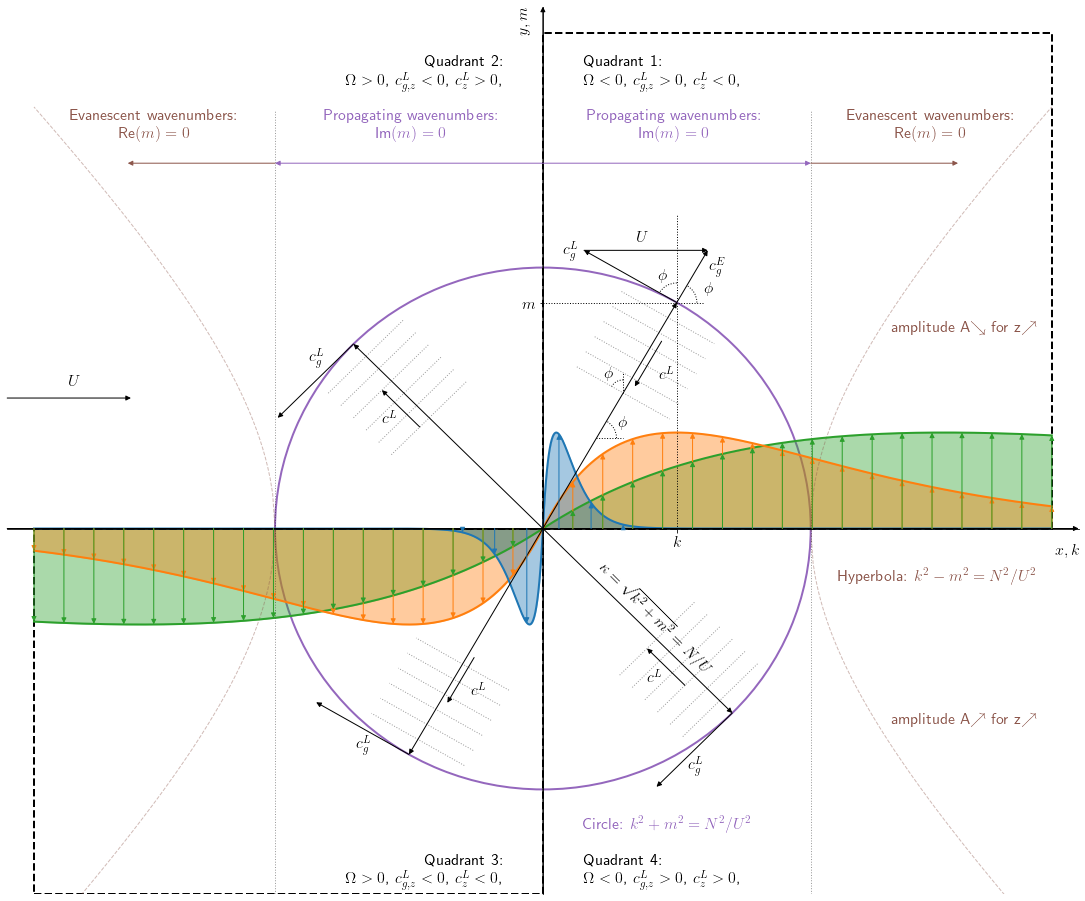

In [41]:
f,ax = plt.subplots(1,1,figsize=(19.2,0.85*19.2))

c1 = 'k'
c2 = plt.cm.tab10(4)
c3 = plt.cm.tab10(5)
c4 = plt.cm.tab10(0)
c5 = plt.cm.tab10(1)
c6 = plt.cm.tab10(2)

# Set axes in the center
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_position('zero')

# Add arrows to axes
ax.annotate("", xy=(0,2), xytext=(0,-1.4),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c1,lw=1))
ax.annotate("", xy=(2,0), xytext=(-2,0),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c1,lw=1))

# Draw arc and hyperbola
ax.add_patch(Arc((0,0),2,2,theta1=0,theta2=360,color=c2,linestyle='-',linewidth=2))
k = np.linspace(1,1.9,100)
ax.plot(k,np.sqrt(k**2-1),color=c3,linestyle='--',linewidth=1,alpha=0.4)
ax.plot(k,-np.sqrt(k**2-1),color=c3,linestyle='--',linewidth=1,alpha=0.4)
ax.plot(-k,np.sqrt(k**2-1),color=c3,linestyle='--',linewidth=1,alpha=0.4)
ax.plot(-k,-np.sqrt(k**2-1),color=c3,linestyle='--',linewidth=1,alpha=0.4)

# Demarc propagating waves and evanescent waves
ax.plot([1,1],[-1.4,1.6],linestyle=':',color=c1, linewidth=1,alpha=0.4)
ax.plot([-1,-1],[-1.4,1.6],linestyle=':',color=c1, linewidth=1,alpha=0.4)
ax.annotate('Propagating wavenumbers: \nIm'+r'$(m)=0$',xy=(0.49,1.5),fontsize=16,ha='center',color=c2)
ax.annotate('Propagating wavenumbers: \nIm'+r'$(m)=0$',xy=(-0.49,1.5),fontsize=16,ha='center',color=c2)
ax.annotate('Evanescent wavenumbers: \nRe'+r'$(m)=0$',xy=(1.45,1.5),fontsize=16,ha='center',color=c3)
ax.annotate('Evanescent wavenumbers: \nRe'+r'$(m)=0$',xy=(-1.45,1.5),fontsize=16,ha='center',color=c3)

ax.annotate("", xy=(-1.55,1.4), xytext=(-1,1.4),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c3,lw=1))
ax.annotate("", xy=(1.55,1.4), xytext=(1,1.4),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c3,lw=1))
ax.annotate("", xy=(-1,1.4), xytext=(1,1.4),
            arrowprops=dict(arrowstyle="<|-|>",shrinkA=0,shrinkB=0,color=c2,lw=1))

def plot_quadrant(Q,phi_local):
    # Phi local is angle local to the quadrant
    phi = phi_local+(Q-1)*np.pi/2
    # Omega_sign
    signk = np.sign(np.cos(phi))
    signm = np.sign(np.sin(phi))
    # Draw wavenumber vector
    ax.annotate("", xy=(np.cos(phi),np.sin(phi)), xytext=(0,0),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c1,lw=1))
    # Draw group velocity
    radius=0.4
    x_e = np.cos(phi) - radius*np.sin(phi_local)
    y_e = np.sin(phi) + signk*signm*radius*np.cos(phi_local)
    ax.annotate("", xy=(x_e,y_e), xytext=(np.cos(phi),np.sin(phi)),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c1,lw=1))
    if Q != 1:
        x_e2 = np.cos(phi) - 0.5*radius*np.sin(phi_local)
        y_e2 = np.sin(phi) + signk*signm*0.5*radius*np.cos(phi_local) 
        ax.annotate(r'$c_g^L$', xy=(x_e2-0.025,y_e2+signm*0.075), fontsize=16)
    
    # Annotate quadrant
    gt_lt = dict({-1:'<',1:'>'})
    text = ( 'Quadrant {}: \n'.format(Q) +
           r'$\Omega {} 0$, '.format(gt_lt[-signk]) +
           r'$c_{{g,z}}^L {} 0$, '.format(gt_lt[signk]) +
           r'$c_z^L {} 0$, '.format(gt_lt[-signk*signm])
    )
    left_right = dict({-1:'right',1:'left'})
    ax.annotate(text, xy=(.15*signk,1.7*signm-(signm-1)*0.17),ha=left_right[signk],fontsize=16)
    
    # Plot wave fronts
    for n in range(6):
        s = 0.4*np.cos(phi)
        x = (np.cos(phi)-s) + s*n/6.
        z = x*np.tan(phi)
        radius = 0.2
        plt.plot([x-radius*np.sin(phi),x+radius*np.sin(phi)],[z+radius*np.cos(phi), z-radius*np.cos(phi)],
                 linestyle=':',c=c1,linewidth=1,alpha=0.4)
        
    # Plot phase speed
    offset=0.05*signm*signk
    xy1 = (0.6*np.cos(phi)+offset*np.sin(phi_local),0.6*np.sin(phi)+offset*np.cos(phi_local))
    xy2 = (0.8*np.cos(phi)+offset*np.sin(phi_local),0.8*np.sin(phi)+offset*np.cos(phi_local))
    if Q in [1,4]:
        ax.annotate("", xy=xy1,xytext=xy2,
                    arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c1,lw=1))
    else:
        ax.annotate("", xy=xy1,xytext=xy2,
                    arrowprops=dict(arrowstyle="<|-",shrinkA=0,shrinkB=0,color=c1,lw=1))
    xy = tuple([sum(x)/2 for x in zip(*[xy1,xy2,(signk*signm*0.11-0.03,-0.11)])])
    ax.annotate(r"$c^L$",xy=xy, fontsize=16)
        
    
plot_quadrant(1,np.pi/3)
plot_quadrant(2,np.pi/4)
plot_quadrant(3,np.pi/3)
plot_quadrant(4,np.pi/4)

# Some stuff specific to Q1
###########################
# Indicate k and m
ax.plot([0.5,0.5],[0,1.2],linestyle=':',linewidth=1,color=c1)
ax.plot([0,0.6],[np.sqrt(3)/2,np.sqrt(3)/2],linestyle=':',linewidth=1,color=c1)
# Group velocity triangle
ax.annotate("", xy=(0.5+0.4/np.sqrt(3)/2,np.sqrt(3)/2 + 0.4/2), xytext=(0.5,np.sqrt(3)/2),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c1,lw=1))
ax.annotate("", xy=(0.5+0.4/np.sqrt(3)/2,np.sqrt(3)/2 + 0.4/2), xytext=(0.5-0.4*np.sqrt(3)/2,np.sqrt(3)/2+0.4/2),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c1,lw=1))
ax.annotate(r'$c_g^L$', xy=(0.075,1.05), fontsize=16)
ax.annotate(r'$c_g^E$', xy=(0.62,0.99), fontsize=16)
ax.annotate(r'$U$', xy=(0.35,1.1), fontsize=16)
# Indicate phi
#ax.add_patch(Arc((0,0),0.2,0.2,theta1=0,theta2=60,color=c1,linestyle=':',linewidth=2,zorder=0))
#ax.annotate(r'$\phi$', xy=(0.12,0.055), fontsize=16)
ax.add_patch(Arc((0.4*0.5,0.4*np.sqrt(3)/2),0.15,0.15,theta1=0,theta2=60,color=c1,linestyle=':',linewidth=1))
ax.plot([0.4*0.5,0.4*0.5+0.1],[0.4*np.sqrt(3)/2, 0.4*np.sqrt(3)/2],linestyle=':',linewidth=1,color=c1)
ax.annotate(r'$\phi$', xy=(0.28,0.39), fontsize=16)
ax.add_patch(Arc((0.5,np.sqrt(3)/2),0.15,0.15,theta1=0,theta2=60,color=c1,linestyle=':',linewidth=1))
ax.annotate(r'$\phi$', xy=(0.6,np.sqrt(3)/2+0.04), fontsize=16)
ax.add_patch(Arc((0.5,np.sqrt(3)/2),0.15,0.15,theta1=90,theta2=150,color=c1,linestyle=':',linewidth=1))
ax.annotate(r'$\phi$', xy=(0.43,np.sqrt(3)/2+0.09), fontsize=16)
ax.plot([0.3,0.3],[np.sqrt(3)*0.3,0.6],linestyle=':',linewidth=1,color=c1)
ax.add_patch(Arc((0.3,np.sqrt(3)*0.3),0.1,0.1,theta1=90,theta2=150,color=c1,linestyle=':',linewidth=1))
ax.annotate(r'$\phi$', xy=(0.23,0.58), fontsize=16)
# Indicate amplitude for evanescent waves
ax.annotate('amplitude A'+r'$\searrow$'+' for z'+r'$\nearrow$', xy=(1.3,0.75), fontsize=16, color=c3)

# Some stuff specific to Q2
###########################
# Length of arrow corresponds to the other arrow indicating U
# Using numerical result because math expression is quite long
ax.annotate("", xy=(-2+0.462,0.5), xytext=(-2,0.5),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c1,lw=1))
ax.annotate(r'$U$', xy = (-1.77,0.55),fontsize=16)

# Some stuff specific to Q4
###########################
# Indicate wave vector
ax.annotate(r'$\kappa=\sqrt{k^2+m^2}=N/U$',xy=(0.2,-0.55),fontsize=16,ha='left',rotation=-45)
ax.annotate('Circle: '+r'$k^2+m^2=N^2/U^2$',xy=(0.15,-1.15),fontsize=16,ha='left',color=c2)
ax.annotate('Hyperbola: '+r'$k^2-m^2=N^2/U^2$',xy=(1.1,-0.2),fontsize=16,ha='left',color=c3)
ax.annotate('amplitude A'+r'$\nearrow$'+' for z'+r'$\nearrow$', xy=(1.3,-0.75), fontsize=16, color=c3)

# Annotate x and y axis
ax.annotate(r'$x, k$',xy=(2,-0.1),ha='right',color=c1,fontsize=16)
ax.annotate(r'$y, m$',xy=(-0.1,2),va='top',color=c1,fontsize=16,rotation=90)

# Wavespectrum
##############
k = np.linspace(-1.9,1.9,1000)
spectrum = lambda x, Fr: x/Fr*np.exp(-np.abs(x)/Fr)
ax.plot(k,spectrum(k,1.5),linestyle='-',linewidth=2,color=c6)
ax.plot(k,spectrum(k,0.5),linestyle='-',linewidth=2,color=c5)
ax.plot(k,spectrum(k,0.05),linestyle='-',linewidth=2,color=c4)
karrow = np.linspace(-1.9,1.9,35)
for ki in karrow:
    ax.annotate("", xy=(ki,spectrum(ki,0.5)), xytext=(ki,0),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c5,lw=1))
    ax.annotate("", xy=(ki,spectrum(ki,1.5)), xytext=(ki,0),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c6,lw=1))
karrow = np.linspace(-0.3,0.3,6)
for ki in karrow:
    ax.annotate("", xy=(ki,spectrum(ki,0.05)), xytext=(ki,0),
            arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color=c4,lw=1))
ax.fill_between(k, 0, spectrum(k,1.5),color=c6, alpha=0.4)
ax.fill_between(k, 0, spectrum(k,0.5),color=c5, alpha=0.4)
ax.fill_between(k, 0, spectrum(k,0.05),color=c4, alpha=0.4)

# Plot rectangles
ax.add_patch(Rectangle((-1.9,-1.4),1.9,1.4,color=c1,linestyle='--',linewidth=2,fill=False))
ax.add_patch(Rectangle((0,0),1.9,1.9,color=c1,linestyle='--',linewidth=2,fill=False))

# Set limits, ticks
_ = ax.set(xlim=[-2,2],
           ylim=[-1.4,2],
           xticks=[0.5],
           xticklabels=[r'$k$'],
           yticks=[np.sqrt(3)/2],
           yticklabels=[r'$m$'],
)

#plt.savefig(os.path.join('Figures','group_velocity_diagram.png'),bbox_inches='tight')
#plt.savefig(os.path.join('Figures','group_velocity_diagram.pdf'),bbox_inches='tight')